# Time series playground

<img src = 'ts_image.png'>

In [138]:
# Import libraries
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import itertools
import datetime

## Import data

In [163]:
# Import data
data = pd.read_csv('temperature.csv')

In [164]:
# Check first observations
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [165]:
data['Formatted Date']

0        2006-04-01 00:00:00.000 +0200
1        2006-04-01 01:00:00.000 +0200
2        2006-04-01 02:00:00.000 +0200
3        2006-04-01 03:00:00.000 +0200
4        2006-04-01 04:00:00.000 +0200
5        2006-04-01 05:00:00.000 +0200
6        2006-04-01 06:00:00.000 +0200
7        2006-04-01 07:00:00.000 +0200
8        2006-04-01 08:00:00.000 +0200
9        2006-04-01 09:00:00.000 +0200
10       2006-04-01 10:00:00.000 +0200
11       2006-04-01 11:00:00.000 +0200
12       2006-04-01 12:00:00.000 +0200
13       2006-04-01 13:00:00.000 +0200
14       2006-04-01 14:00:00.000 +0200
15       2006-04-01 15:00:00.000 +0200
16       2006-04-01 16:00:00.000 +0200
17       2006-04-01 17:00:00.000 +0200
18       2006-04-01 18:00:00.000 +0200
19       2006-04-01 19:00:00.000 +0200
20       2006-04-01 20:00:00.000 +0200
21       2006-04-01 21:00:00.000 +0200
22       2006-04-01 22:00:00.000 +0200
23       2006-04-01 23:00:00.000 +0200
24       2006-04-10 00:00:00.000 +0200
25       2006-04-10 01:00

## Selecting useful feature for time series analysis

In [166]:
# Keep three features
print(data.shape)
ts = data.loc[:,['Formatted Date','Temperature (C)', 'Apparent Temperature (C)','Wind Speed (km/h)']]

# Keep 1500 days of observations
ts = ts.iloc[:(24*1500),:]
print(ts.shape)

# Rename columns
ts.columns = ['Date','Temperature','ATemperature','WindSpeed']

(96453, 12)
(36000, 4)


In [167]:
ts['Date'].head()

0    2006-04-01 00:00:00.000 +0200
1    2006-04-01 01:00:00.000 +0200
2    2006-04-01 02:00:00.000 +0200
3    2006-04-01 03:00:00.000 +0200
4    2006-04-01 04:00:00.000 +0200
Name: Date, dtype: object

In [168]:
# in comprehension method, remove extra characters
ts['Date'] = [ts.loc[i,'Date'][:-10] for i in tqdm(range(ts.shape[0]))]

100%|█████████████████████████████████████████████████████████████████████████| 36000/36000 [00:00<00:00, 91421.94it/s]


In [169]:
ts['Date'].head()

0    2006-04-01 00:00:00
1    2006-04-01 01:00:00
2    2006-04-01 02:00:00
3    2006-04-01 03:00:00
4    2006-04-01 04:00:00
Name: Date, dtype: object

## Very important step

In [170]:
# Convert string date to timestamp
ts['Date'] = pd.to_datetime(ts['Date'])

#c
ts2 = ts.copy()

In [173]:
min(ts['Date'])

Timestamp('2006-01-01 00:00:00')

In [174]:
X = pd.date_range(start=min(ts['Date']), freq='H',periods=36000)

# Set index as date
ts.set_index(X, inplace=True)
#ts2.set_index('Date', inplace = True)

In [175]:
ts.columns

Index(['Date', 'Temperature', 'ATemperature', 'WindSpeed'], dtype='object')

In [176]:
print(ts.shape)
print(ts2.shape)

(36000, 4)
(36000, 4)


In [177]:
print(ts['Date'].head(48))

2006-01-01 00:00:00   2006-04-01 00:00:00
2006-01-01 01:00:00   2006-04-01 01:00:00
2006-01-01 02:00:00   2006-04-01 02:00:00
2006-01-01 03:00:00   2006-04-01 03:00:00
2006-01-01 04:00:00   2006-04-01 04:00:00
2006-01-01 05:00:00   2006-04-01 05:00:00
2006-01-01 06:00:00   2006-04-01 06:00:00
2006-01-01 07:00:00   2006-04-01 07:00:00
2006-01-01 08:00:00   2006-04-01 08:00:00
2006-01-01 09:00:00   2006-04-01 09:00:00
2006-01-01 10:00:00   2006-04-01 10:00:00
2006-01-01 11:00:00   2006-04-01 11:00:00
2006-01-01 12:00:00   2006-04-01 12:00:00
2006-01-01 13:00:00   2006-04-01 13:00:00
2006-01-01 14:00:00   2006-04-01 14:00:00
2006-01-01 15:00:00   2006-04-01 15:00:00
2006-01-01 16:00:00   2006-04-01 16:00:00
2006-01-01 17:00:00   2006-04-01 17:00:00
2006-01-01 18:00:00   2006-04-01 18:00:00
2006-01-01 19:00:00   2006-04-01 19:00:00
2006-01-01 20:00:00   2006-04-01 20:00:00
2006-01-01 21:00:00   2006-04-01 21:00:00
2006-01-01 22:00:00   2006-04-01 22:00:00
2006-01-01 23:00:00   2006-04-01 2

In [178]:
print(X)

DatetimeIndex(['2006-01-01 00:00:00', '2006-01-01 01:00:00',
               '2006-01-01 02:00:00', '2006-01-01 03:00:00',
               '2006-01-01 04:00:00', '2006-01-01 05:00:00',
               '2006-01-01 06:00:00', '2006-01-01 07:00:00',
               '2006-01-01 08:00:00', '2006-01-01 09:00:00',
               ...
               '2010-02-08 14:00:00', '2010-02-08 15:00:00',
               '2010-02-08 16:00:00', '2010-02-08 17:00:00',
               '2010-02-08 18:00:00', '2010-02-08 19:00:00',
               '2010-02-08 20:00:00', '2010-02-08 21:00:00',
               '2010-02-08 22:00:00', '2010-02-08 23:00:00'],
              dtype='datetime64[ns]', length=36000, freq='H')


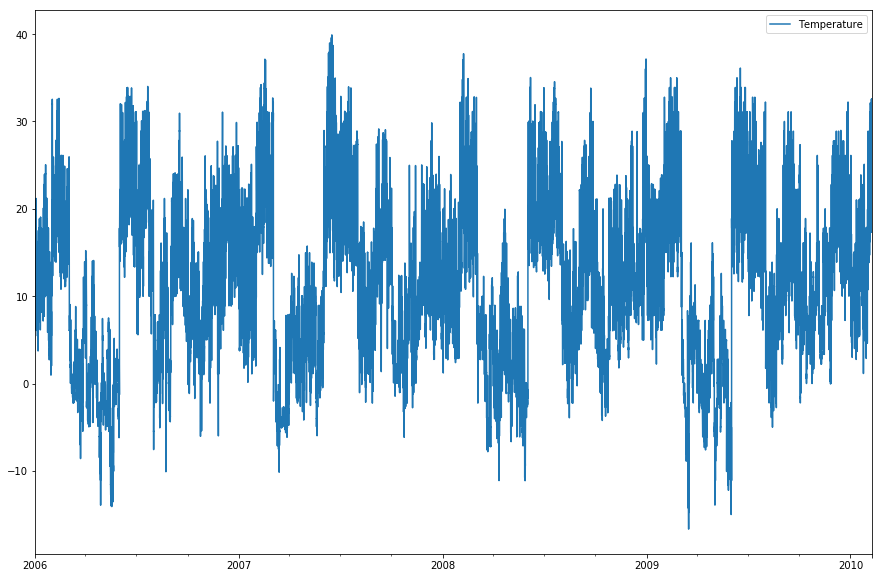

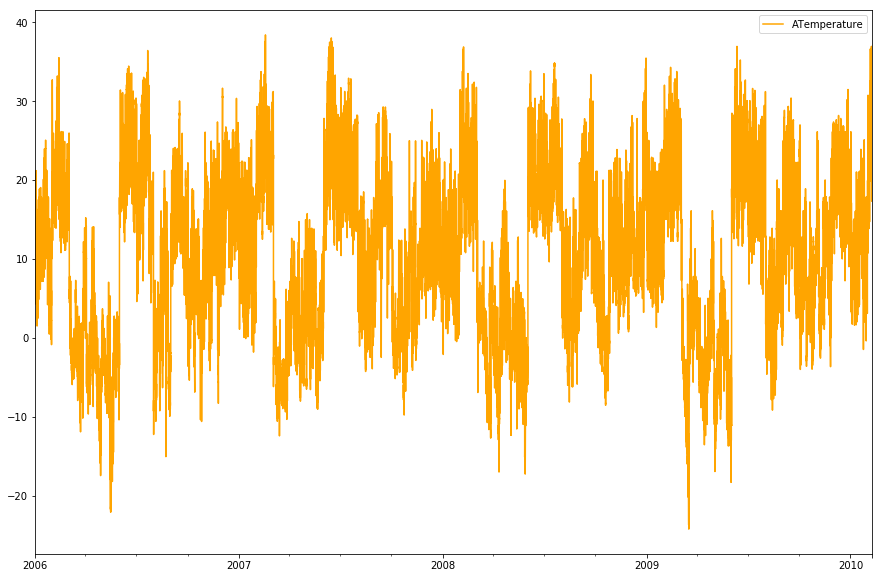

In [179]:
# plot time series
ts[['Temperature']].plot(figsize=(15,10))
ts[['ATemperature']].plot(figsize=(15,10), color = 'orange')

## Some panda manipulations

In [180]:
# All dates above 2008
print(ts.index.year.unique())
print('\n')
print(ts.index[ts.index > '2008'])
print('\n')
print(ts.index[ts.index > '2008'].year.unique())

Int64Index([2006, 2007, 2008, 2009, 2010], dtype='int64')


DatetimeIndex(['2008-01-01 01:00:00', '2008-01-01 02:00:00',
               '2008-01-01 03:00:00', '2008-01-01 04:00:00',
               '2008-01-01 05:00:00', '2008-01-01 06:00:00',
               '2008-01-01 07:00:00', '2008-01-01 08:00:00',
               '2008-01-01 09:00:00', '2008-01-01 10:00:00',
               ...
               '2010-02-08 14:00:00', '2010-02-08 15:00:00',
               '2010-02-08 16:00:00', '2010-02-08 17:00:00',
               '2010-02-08 18:00:00', '2010-02-08 19:00:00',
               '2010-02-08 20:00:00', '2010-02-08 21:00:00',
               '2010-02-08 22:00:00', '2010-02-08 23:00:00'],
              dtype='datetime64[ns]', length=18479, freq='H')


Int64Index([2008, 2009, 2010], dtype='int64')


In [181]:
# All dates above 2008-05
print(ts.index[ts.index > '2008-05'])
print('\n')
print(ts.index[ts.index > '2008-05'].year.unique())
print('\n')

# Check out that in 2008, we only have from may to december months
above_2008_05 = ts[ts.index > '2008-05']
print(above_2008_05.index[above_2008_05.index.year == 2008].month.unique())

DatetimeIndex(['2008-05-01 01:00:00', '2008-05-01 02:00:00',
               '2008-05-01 03:00:00', '2008-05-01 04:00:00',
               '2008-05-01 05:00:00', '2008-05-01 06:00:00',
               '2008-05-01 07:00:00', '2008-05-01 08:00:00',
               '2008-05-01 09:00:00', '2008-05-01 10:00:00',
               ...
               '2010-02-08 14:00:00', '2010-02-08 15:00:00',
               '2010-02-08 16:00:00', '2010-02-08 17:00:00',
               '2010-02-08 18:00:00', '2010-02-08 19:00:00',
               '2010-02-08 20:00:00', '2010-02-08 21:00:00',
               '2010-02-08 22:00:00', '2010-02-08 23:00:00'],
              dtype='datetime64[ns]', length=15575, freq='H')


Int64Index([2008, 2009, 2010], dtype='int64')


Int64Index([5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')


In [182]:
# Show dataframe between 2006 and 2008
ts[(ts.index>='2006') & (ts.index>='2008')].head()

,Date,Temperature,ATemperature,WindSpeed
2008-01-01 00:00:00,2007-09-09 00:00:00,12.405556,12.405556,11.0768
2008-01-01 01:00:00,2007-09-09 01:00:00,12.450000,12.450000,11.1895
2008-01-01 02:00:00,2007-09-09 02:00:00,11.316667,11.316667,13.3952
2008-01-01 03:00:00,2007-09-09 03:00:00,13.983333,13.983333,14.3129
2008-01-01 04:00:00,2007-09-09 04:00:00,14.488889,14.488889,17.4685


In [183]:
def zoom(dataframe, startDate, endDate, feature=None):
    
    ''' plot the time series in a specific interval
    dataframe (dataframe): need timestamp as index
    startDate (string): a string with same date format than index
    endDate (string): a string with same date format than index
    feature (list of string): list of features to select
    '''
    
    ts_to_plot = dataframe[(dataframe.index>=startDate) & (dataframe.index<=endDate)]
    if (feature == None):
        
        ts_to_plot.plot(figsize=(15,10))
    else:
        for index, i in enumerate(feature):
            plt.subplot(len(feature),1,index+1)
            ts_to_plot[i].plot(figsize=(15,10))
        plt.show()

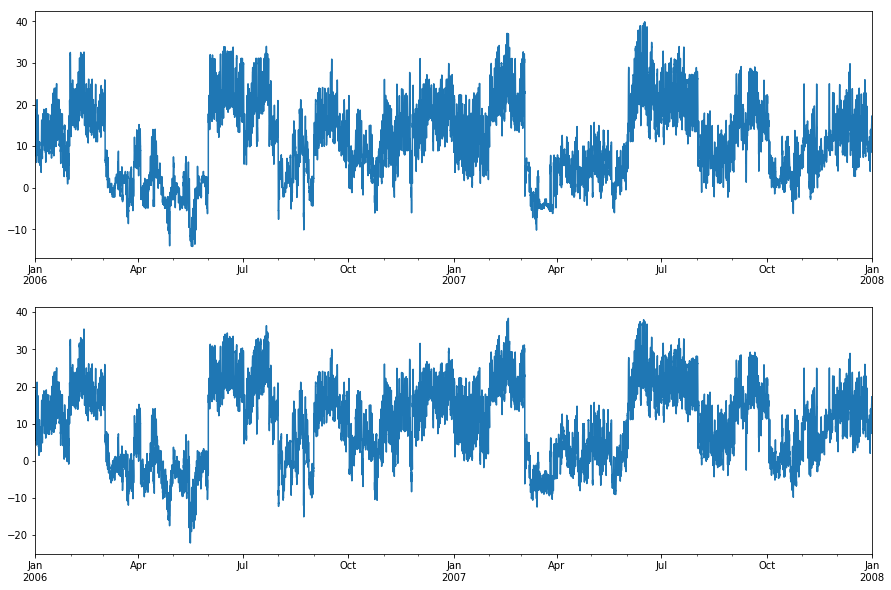

In [184]:
zoom(ts, '2006', '2008', feature = ['Temperature', 'ATemperature'])

## Convert to Time series

In [185]:
index = pd.date_range(start=min(ts.index), freq='H',periods=36000)
ts_r = pd.Series(np.ravel(ts['Temperature']), index=index)

In [186]:
ts_r_daily = ts_r.resample(rule = 'd').mean()
ts_r_monthly = ts_r.resample(rule = 'm').mean()
ts_r_yearly = ts_r.resample(rule = 'y').mean()

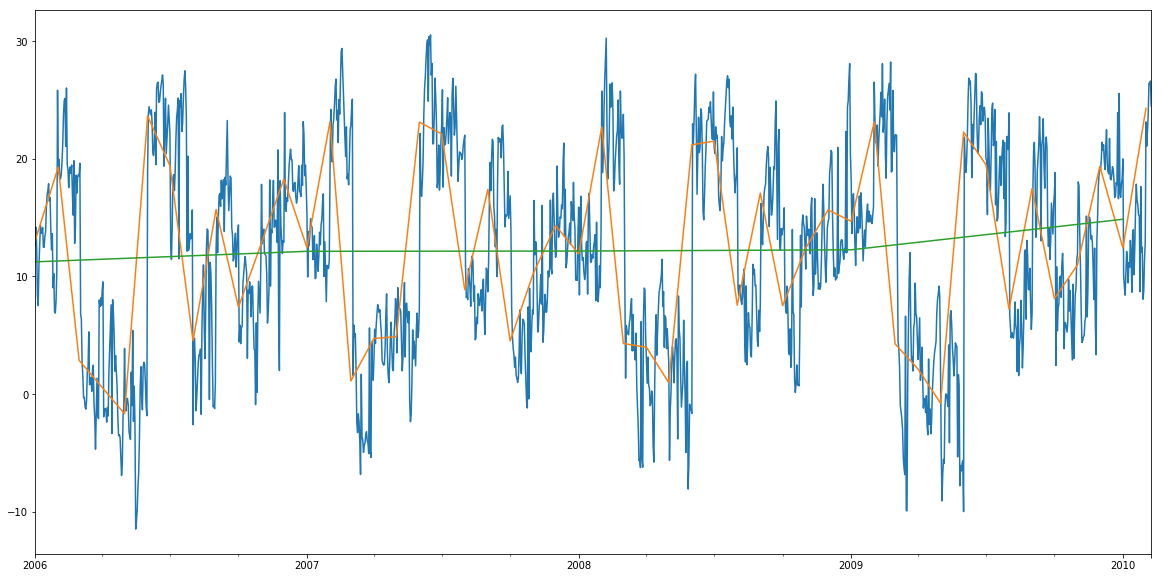

In [187]:
ts_r_daily.plot(figsize=(20,10))
ts_r_monthly.plot()
ts_r_yearly.plot()

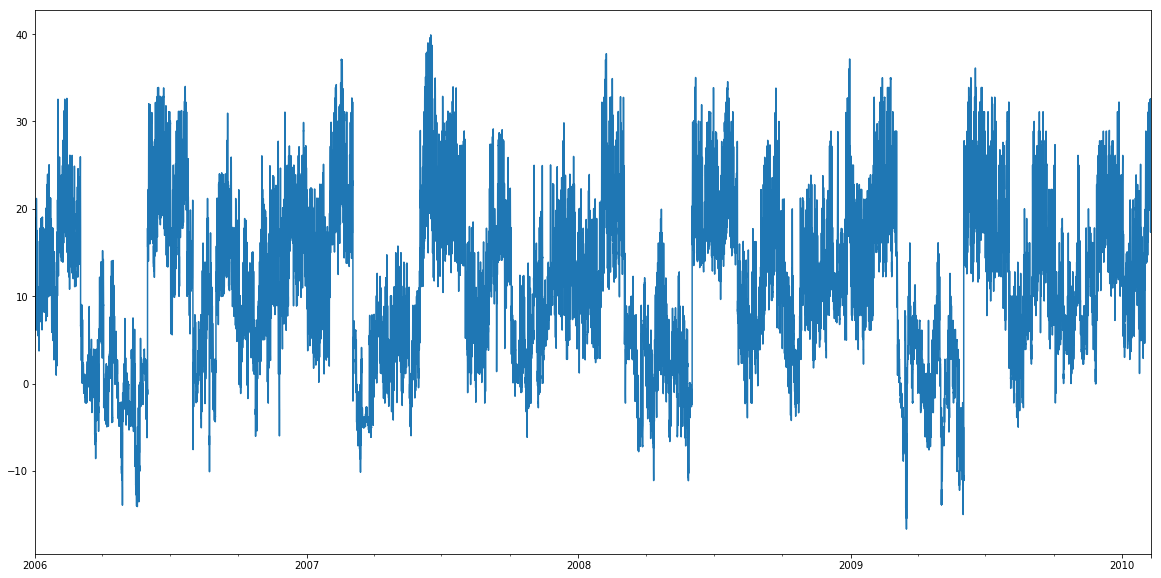

In [188]:
ts_r.plot(figsize=(20,10))

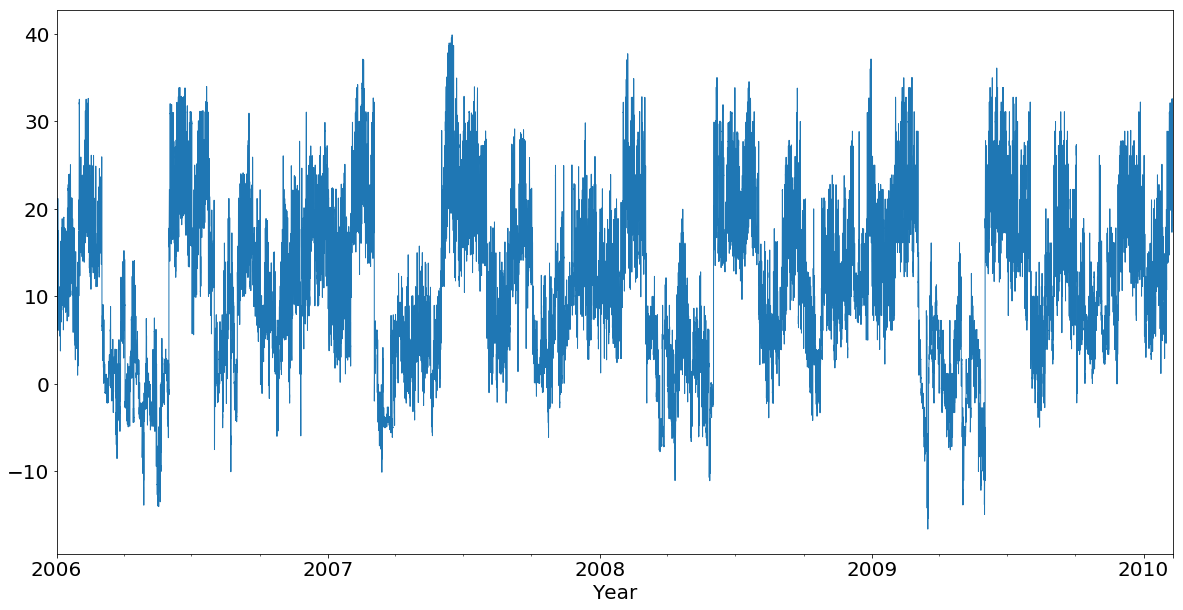

In [189]:
ts_r.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [190]:
ts_r[:5]

2006-01-01 00:00:00    9.472222
2006-01-01 01:00:00    9.355556
2006-01-01 02:00:00    9.377778
2006-01-01 03:00:00    8.288889
2006-01-01 04:00:00    8.755556
Freq: H, dtype: float64

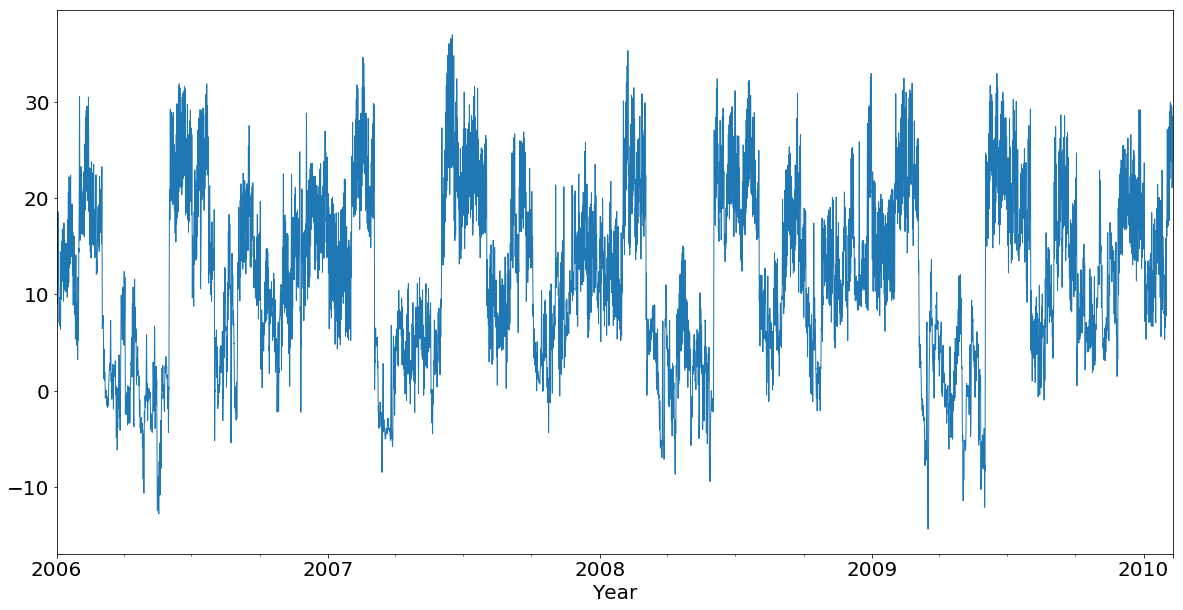

In [191]:
trend_temp = ts_r
# daily observation instead of hourly
trend_temp = trend_temp.rolling(12).mean()
trend_temp.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20);

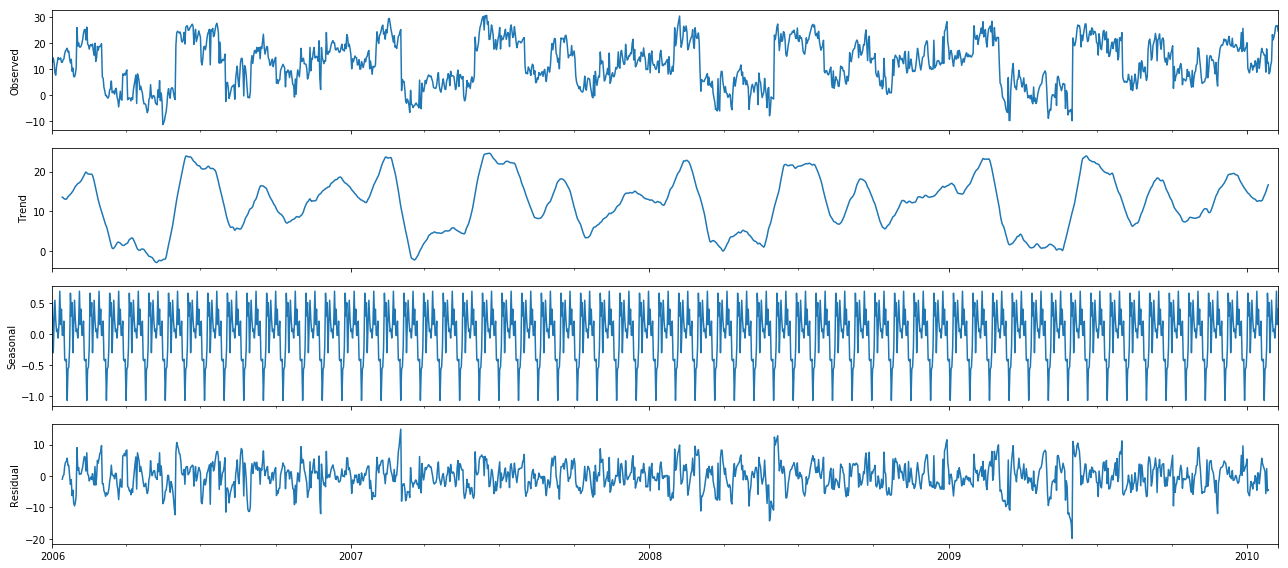

In [192]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_r_daily, model='additive', freq = 24)
fig = decomposition.plot()
plt.show()

Time series forecasting with ARIMA
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.
ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [193]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [195]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_r_daily,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:12336.169793296485
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:11342.061455176505
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:10693.074960117889
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:10543.03719768863
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:10570.597569055586
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:10547.335087391419
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:10579.533714675239
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:10244.80404909337
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:10820.659124757865
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:10220.553939422607
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:9905.130757674726
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:9484.916165612569
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:9727.183805473505
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:9593.641759167347
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:9688.444442253965
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:9329.070060232352
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:8314.89076271559
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:8251.528844040815
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:9390

The above output suggests that SARIMAX(1, 0, 1)x(0, 1, 1, 12) yields the lowest AIC value of 8120. Therefore we should consider this to be optimal option.

## Fitting the ARIMA model

In [196]:
mod = sm.tsa.statespace.SARIMAX(ts_r_daily,
                                # set best model parameters
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9424      0.010     95.444      0.000       0.923       0.962
ma.L1         -0.2321      0.022    -10.589      0.000      -0.275      -0.189
ma.S.L12      -1.0000     19.751     -0.051      0.960     -39.711      37.711
sigma2        13.9007    274.682      0.051      0.960    -524.466     552.268


We should always run model diagnostics to investigate any unusual behavior.

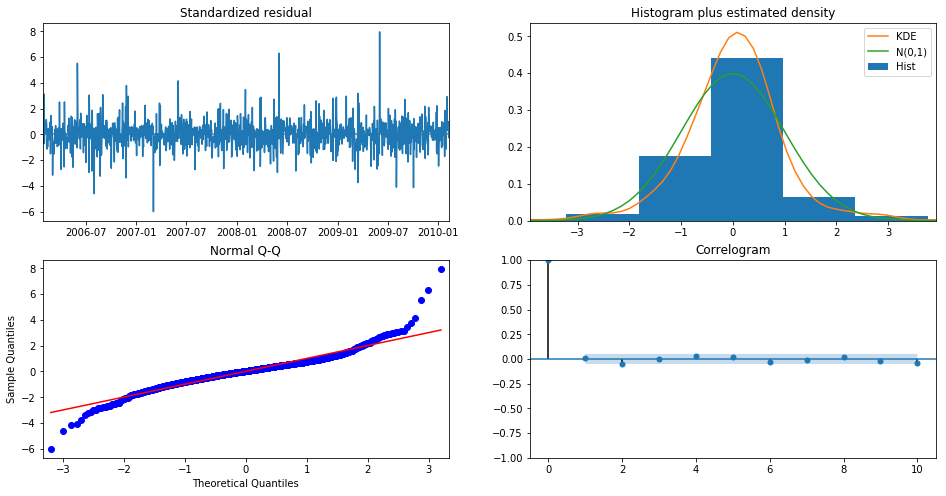

In [197]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

## Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

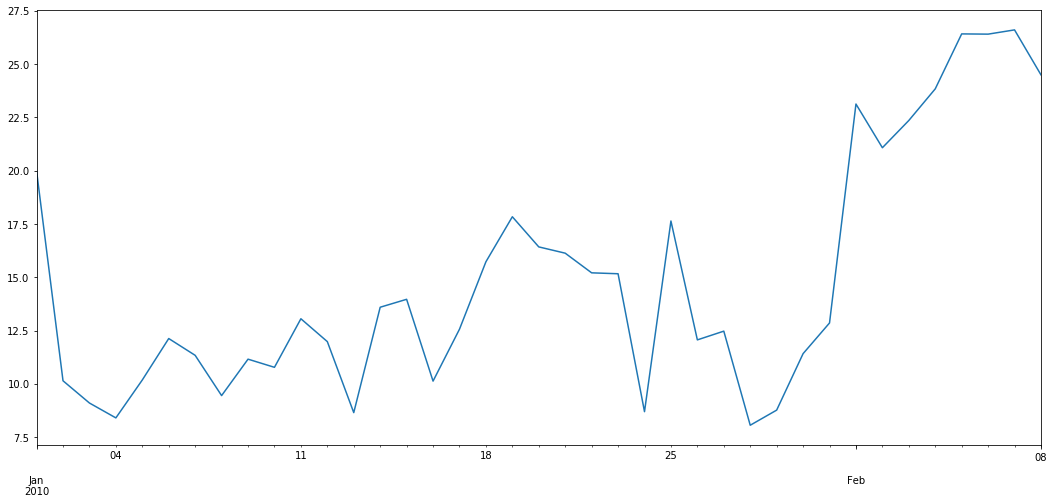

In [198]:
ts_r_daily['2010':].plot()

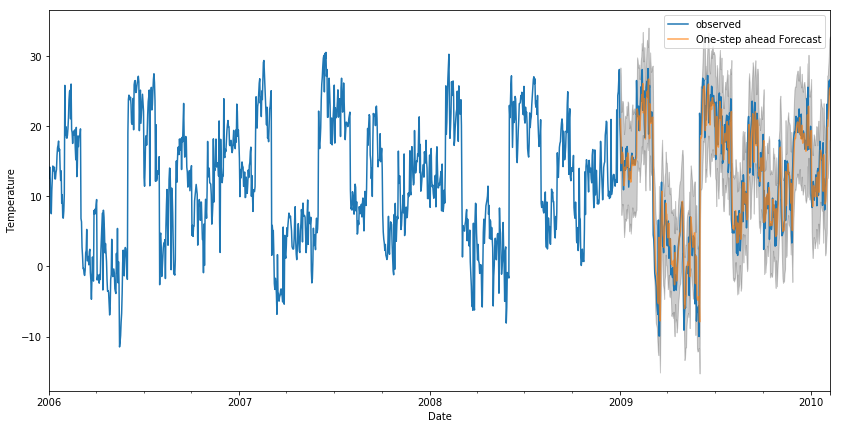

In [93]:
pred = results.get_prediction(start=pd.to_datetime('2009'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_r_daily['2006':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

In [199]:
# Predictions
pred.predicted_mean[:5]

2009-01-01    21.035457
2009-01-02    18.461777
2009-01-03    14.688222
2009-01-04    15.875435
2009-01-05    16.265909
Freq: D, dtype: float64

In [200]:
ts_r_forecasted = pred.predicted_mean
ts_r_truth = ts_r_daily['2009-01-01':]
mse = ((ts_r_forecasted - ts_r_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 15.32


Producing and visualizing forecasts

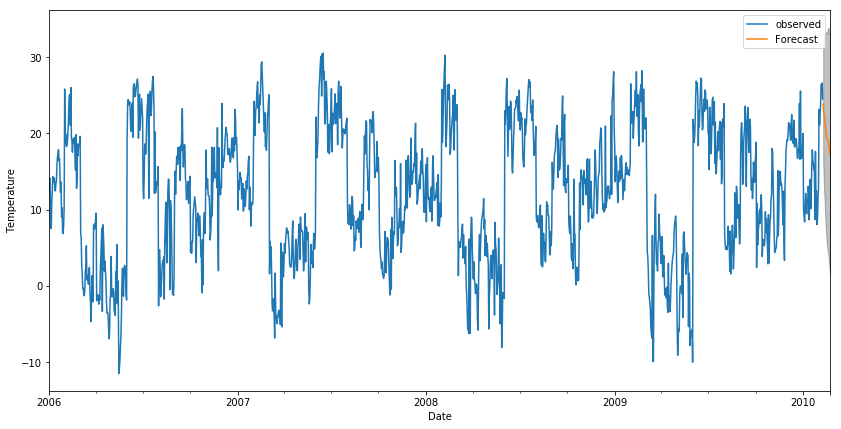

In [202]:
# does it capture seasonality ?
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()
ax = ts_r_daily.plot(label='observed', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

Our model clearly captured Temperature seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

## Going further

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

# Extra exercices

## Exo 1

In [144]:
# Input
s1 = "2010 Jan 1"
s2 = '31-1-2000' 
s3 = 'October10, 1996, 10:40pm'

# Deisred Output
#> 2010-01-01 00:00:00
#> 2000-01-31 00:00:00
#> 2019-10-10 22:40:00

In [145]:
from dateutil.parser import parse
print(parse(s1))
print(parse(s2))
print(parse(s3))

2010-01-01 00:00:00
2000-01-31 00:00:00
1996-10-10 22:40:00


## Exo 2

How many days has it been since you were born?

In [146]:
# Input
bday = 'Oct 2, 1869'  # use bday

In [147]:
import datetime
from dateutil.parser import parse

# Solution
td = datetime.datetime.now() - parse(bday)
td.days

54722

## Exo 3

Count the number of saturdays between two dates

In [148]:
# Input
import datetime

d1 = datetime.date(1869, 1, 2)
d2 = datetime.date(1869, 10, 2)

# Desired Output
#> 40

In [149]:
# Solution
delta = d2 - d1  # timedelta

# Get all dates 
dates_btw_d1d2 = [(d1 + datetime.timedelta(i)) for i in range(delta.days + 1)]

n_saturdays = 0
for d in dates_btw_d1d2:
    n_saturdays += int(d.isoweekday() == 6)

print(n_saturdays)  

40


## Exo 4

How many days is it until your next birthday this year?

In [150]:
# Input
bday = 'Oct 2, 1869'  # use b'day

In [151]:
import datetime
from dateutil.parser import parse

# Solution
bdate = parse(bday)
current_bdate = datetime.date(year=datetime.date.today().year, month=bdate.month, day=bdate.day) 
td = current_bdate - datetime.date.today()
td.days

64

## Exo 5

Count the number of days between successive days in the following list.

In [152]:
# Input
['Oct, 2, 1869', 'Oct, 10, 1869', 'Oct, 15, 1869', 'Oct, 20, 1869', 'Oct, 23, 1869']

# Desired Output
#> [8, 5, 5, 3]

['Oct, 2, 1869',
 'Oct, 10, 1869',
 'Oct, 15, 1869',
 'Oct, 20, 1869',
 'Oct, 23, 1869']

In [154]:
# Solution
import datetime
from dateutil.parser import parse
import numpy as np

datestrings = ['Oct, 2, 1869', 'Oct, 10, 1869', 'Oct, 15, 1869', 'Oct, 20, 1869', 'Oct, 23, 1869']

dates = [parse(d) for d in datestrings]

print([d.days for d in np.diff(dates)])

[8, 5, 5, 3]


## Exo 6

Convert the number of days till your next birthday to seconds

In [155]:
# Input
import datetime
bdate = datetime.date(1869, 10, 2)
td = datetime.date.today() - bdate

In [156]:
# Solution
td.total_seconds()

4727980800.0

## Exo 7

Convert a given date to a datetime set at the beginning of the day

In [157]:
# Input
import datetime
date = datetime.date(1869, 10, 2)

# Desired Output
#> 1869-10-02 00:00:00

In [158]:
from datetime import date, datetime
d = date(1869, 10, 2)
print(datetime.combine(d, datetime.min.time()))
#> 1869-10-02 00:00:00

1869-10-02 00:00:00


## Exo 8

Get the last day of the month for the below given date in python

In [159]:
# Input
import datetime
dt = datetime.date(1952, 2, 12)

# Desired Output
#> 29

In [160]:
# Solution
import calendar
calendar.monthrange(dt.year,dt.month)[1]

29

## Exo 9

Count the Sundays does the month of February 1948 have?

In [161]:
import datetime
from calendar import monthrange

d1 = datetime.date(1948, 2, 1)
n_days = monthrange(1948, 2)

# Get all dates 
dates_btw_d1d2 = [(d1 + datetime.timedelta(i)) for i in range(n_days[1])]

n_sundays = 0
for d in dates_btw_d1d2:
    n_sundays += int(d.isoweekday() == 6)

print(n_sundays)    #> 4

4


## Exo 10

Format a given date to “mmm-dd, YYYY” fortmat?

In [163]:
# input
import datetime
d1 = datetime.date(2010, 9, 28)

# Desired output
#> 'Sep-28, 2010'

In [164]:
# Solution
d1.strftime('%b-%d, %Y')

'Sep-28, 2010'

## Exo 11

Convert the below datetime to Year-Qtr format?

In [165]:
# input
import datetime
d1 = datetime.datetime(2010, 9, 28, 10, 40, 59)

# Desired output
#> '2010-Q3'

In [166]:
# Solution
f'{d1.year}-Q{d1.month//4 + 1}'

'2010-Q3'

## Exo 12

Convert the below unix timestamp to a readable date

In [167]:
# Input
unixtimestamp = 528756281

# Desired Output
#> 04-October-1986

In [168]:
# Solution
import datetime
dt = datetime.datetime.fromtimestamp(528756281)
dt.strftime('%d-%B-%Y')

'04-October-1986'

## Exo 13

If it is ‘2001-01-31::3:30:0’ in ‘Asia/Tokyo’. What time is it in ‘Asia/Kolkata’?

In [171]:
import datetime
import pytz
dt_in = datetime.datetime(2001, 1, 31, 3, 30, 0, 0, tzinfo=pytz.timezone('Asia/Tokyo'))

# Desired Solution
#> datetime.datetime(2001, 1, 30, 23, 41, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>)

In [172]:
# Solution
india_tz = pytz.timezone('Asia/Kolkata')
dt_in.astimezone(india_tz)

datetime.datetime(2001, 1, 30, 23, 41, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>)

## Exo 14

Fill up missing dates in a given irregular sequence of dates?

In [173]:
# Input
['Oct 2, 1869', 'Oct 5, 1869', 'Oct 7, 1869', 'Oct 9, 1869']

# Desired Output
#> ['Oct 02, 1869', 'Oct 03, 1869', 'Oct 04, 1869', 'Oct 05, 1869', 
#> 'Oct 06, 1869', 'Oct 07, 1869', 'Oct 08, 1869', 'Oct 09, 1869']

['Oct 2, 1869', 'Oct 5, 1869', 'Oct 7, 1869', 'Oct 9, 1869']

In [174]:
# Solution
import datetime
from dateutil.parser import parse
import numpy as np

dates = [parse(d) for d in datestrings]

d1 = np.min(dates)
d2 = np.max(dates)

delta = d2 - d1  # timedelta

# Get all dates 
dates_btw_d1d2 = [(d1 + datetime.timedelta(i)).strftime('%b %d, %Y') for i in range(delta.days + 1)]
print(dates_btw_d1d2)

['Oct 02, 1869', 'Oct 03, 1869', 'Oct 04, 1869', 'Oct 05, 1869', 'Oct 06, 1869', 'Oct 07, 1869', 'Oct 08, 1869', 'Oct 09, 1869', 'Oct 10, 1869', 'Oct 11, 1869', 'Oct 12, 1869', 'Oct 13, 1869', 'Oct 14, 1869', 'Oct 15, 1869', 'Oct 16, 1869', 'Oct 17, 1869', 'Oct 18, 1869', 'Oct 19, 1869', 'Oct 20, 1869', 'Oct 21, 1869', 'Oct 22, 1869', 'Oct 23, 1869']


# END